<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [3]:
seaborn.__version__

'0.9.0'

In [4]:
dataset = pandas.read_csv('.\datasets\hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [5]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [6]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [7]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


In [8]:
ds_arg = dataset[ dataset['ISO_code']=='ARG']
ds_arg[['year','ef_score','hf_score']]

,year,ef_score,hf_score
3,2016,4.84,6.469848
165,2015,4.98,6.502548
327,2014,4.49,6.207145
489,2013,4.88,6.570844
651,2012,5.04,6.569287
813,2011,5.58,6.855326
975,2010,5.59,6.885658
1137,2009,5.82,6.997731
1299,2008,5.88,7.035120


In [9]:
ds_arg[ds_arg.year==2016]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.79196,4.34393,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0


In [10]:
ds_head=dataset.head()
ds_head[['year','ef_score','hf_score']]
# equivalente a:
# dataset.head()[['year','ef_score','hf_score']]
# y equivalente a:
# dataset[['year','ef_score','hf_score']].head()

,year,ef_score,hf_score
0,2016,7.54,7.568140
1,2016,4.99,5.135886
2,2016,5.17,5.640662
3,2016,4.84,6.469848
4,2016,7.57,7.241402


In [11]:
ds_arg['hf_score'].mean()

6.677056379444445

In [12]:
dataset['hf_score'].mean()

6.993443755514514

In [13]:
dataset.groupby('year').sum()['pf_ss_homicide']

year
2008    1026.624553
2009    1027.772911
2010    1120.008575
2011    1124.426787
2012    1129.355939
2013    1168.759114
2014    1191.580064
2015    1203.286092
2016    1223.273006
Name: pf_ss_homicide, dtype: float64

In [14]:
dataset[ (dataset['year'] == 2016) & (dataset['ISO_code']=='ARG') ] ['hf_score']          

3    6.469848
Name: hf_score, dtype: float64

In [15]:
dataset.query('year==2015 and ISO_code=="ARG"')

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
165,2015,ARG,Argentina,Latin America & the Caribbean,6.675262,5.674435,4.255603,5.5351,7.386323,10.0,...,2.595699,5.351838,5.975852,4.920121,5.549339,4.98,153.0,6.502548,107.0,3.0


De aca para abajo, cosas del practico...

In [16]:
dataset.query('region=="Latin America & the Caribbean"')[['pf_identity','hf_score']].describe()

,pf_identity,hf_score
count,232.000000,232.000000
mean,8.765086,7.047982
std,1.711732,0.608904
min,5.000000,4.200724
25%,7.500000,6.779311
50%,10.000000,7.028045
75%,10.000000,7.339903
max,10.000000,8.290152


In [34]:
dataset.query('region=="North America"')[['pf_identity','hf_score']].describe()

,pf_identity,hf_score
count,18.000000,18.000000
mean,9.833333,8.461915
std,0.320844,0.176386
min,9.250000,8.187366
25%,10.000000,8.278206
50%,10.000000,8.484161
75%,10.000000,8.622812
max,10.000000,8.719553


In [17]:
dataset.query('region=="Latin America & the Caribbean"')[['pf_identity','hf_score']].mean()

pf_identity    8.765086
hf_score       7.047982
dtype: float64

In [18]:
dataset.query('region=="Latin America & the Caribbean"')[['pf_identity','hf_score']].median()

pf_identity    10.000000
hf_score        7.028045
dtype: float64

In [19]:
dataset.query('region=="Latin America & the Caribbean"')[['pf_identity','hf_score']].std()

pf_identity    1.711732
hf_score       0.608904
dtype: float64

In [20]:
dataset.query('region=="Latin America & the Caribbean"')[['pf_identity','hf_score']].min()

pf_identity    5.000000
hf_score       4.200724
dtype: float64

In [21]:
dataset.query('region=="Latin America & the Caribbean"')[['pf_identity','hf_score']].max()

pf_identity    10.000000
hf_score        8.290152
dtype: float64

In [22]:
dataset[['pf_identity','hf_score']].mean()

pf_identity    7.334180
hf_score       6.993444
dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

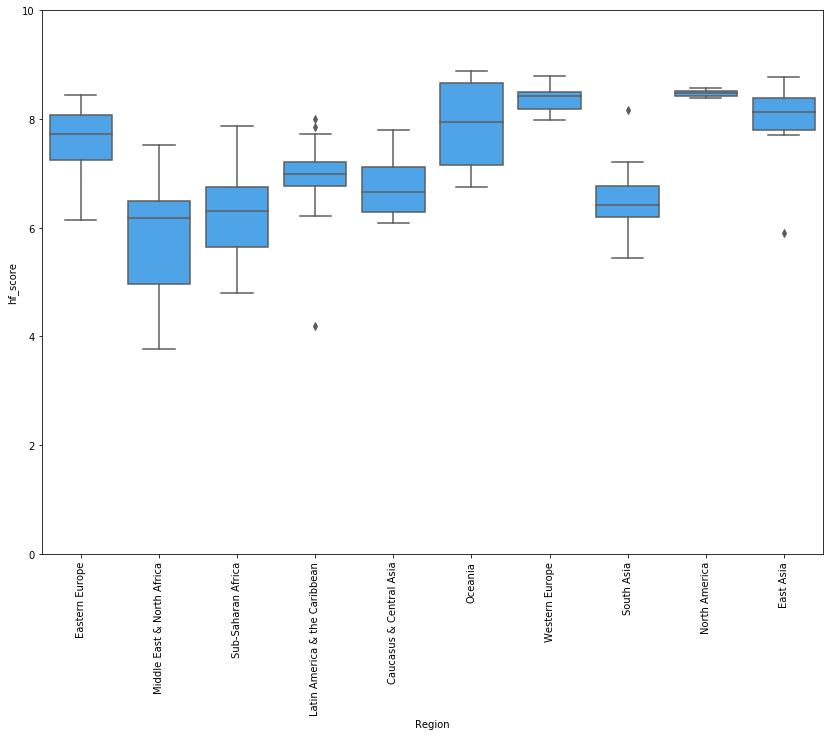

In [31]:
BLUE='#35A7FF'
plt.figure( figsize=(14,10))
dataset_2016 = dataset.query('year==2016')
seaborn.boxplot(data=dataset_2016, x="region", y="hf_score", color=BLUE)
plt.ylabel("hf_score")
plt.xlabel("Region")
plt.ylim(0,10)
plt.xticks(rotation='vertical')
#seaborn.despline(left=True)

In [53]:
ds = dataset.query(' region=="Latin America & the Caribbean" or region=="Oceania" or region=="North America" ')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

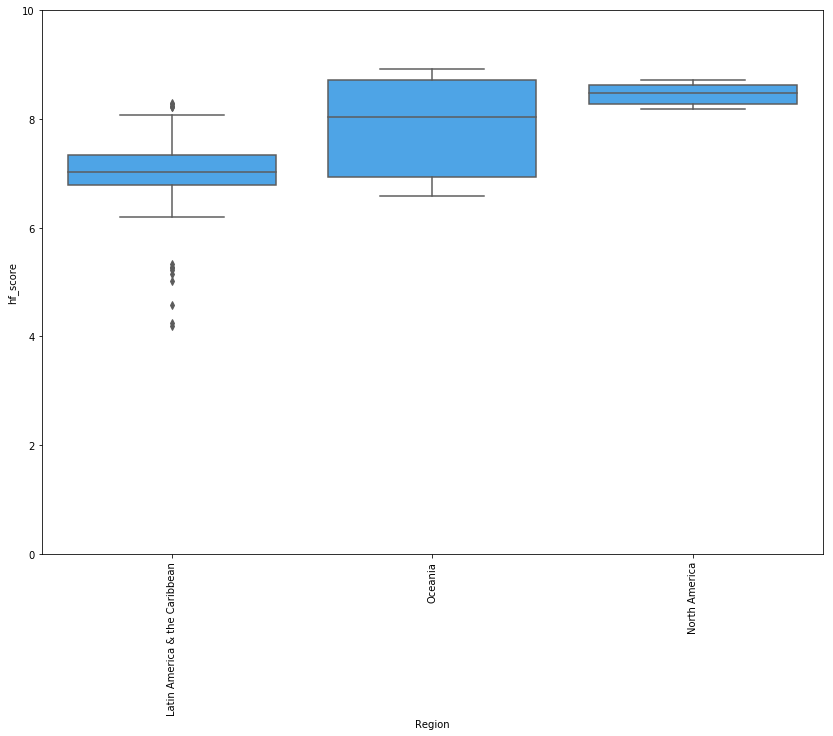

In [54]:
BLUE='#35A7FF'
plt.figure( figsize=(14,10))

seaborn.boxplot(data=ds, x="region", y="hf_score", color=BLUE)

plt.ylabel("hf_score")
plt.xlabel("Region")
plt.ylim(0,10)
plt.xticks(rotation='vertical')


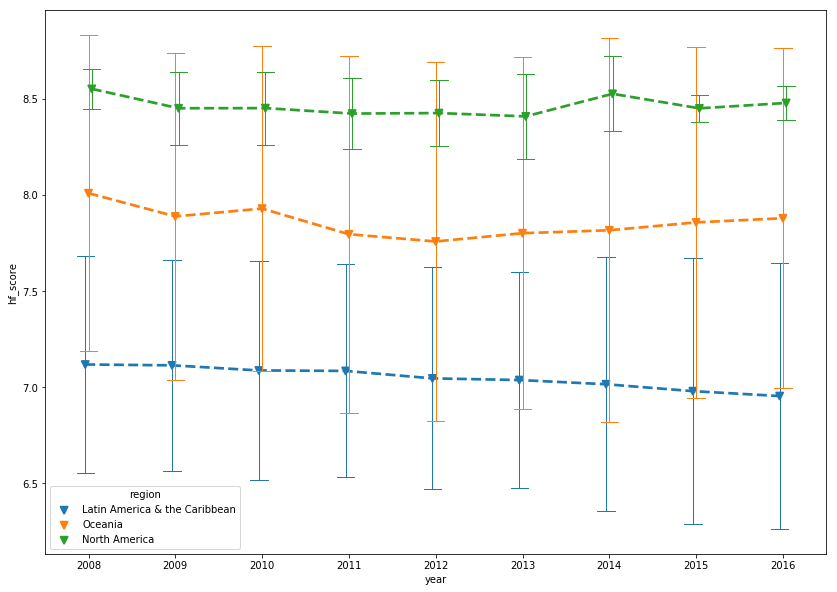

In [55]:
plt.figure( figsize=(14,10))
seaborn.pointplot ( data=ds, x='year', y='hf_score', hue='region', 
                  markers='v', dodge=True,
                 linestyles='--', errwidth=1, ci='sd', capsize=0.2)